# Ramen Ratings Analysis: Unveiling What Makes Instant Noodles Great 🍜
Instant noodles are more than just a quick meal — they’re a global phenomenon with fierce brand loyalty, regional preferences, and a wide range of quality.
In this project, I dove deep into a dataset of over a thousand ramen product reviews across countries, brands, and styles to answer key questions:

### Which countries produce the highest-rated ramen?

### Which brands consistently deliver excellence?

### Does the packaging style impact product rating?

### What patterns can we discover from consumer ratings?

Using Python, I cleaned and explored the data, summarized categorical trends, and visualized key insights to better understand global preferences in ramen.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\wasee\Downloads\ramen-ratings.csv")
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [3]:
df_original = df.copy()

In [4]:
df_clean = df_original.copy()

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [6]:
df_clean.duplicated().sum()

0

In [7]:
df_clean['Style'].value_counts()

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

In [8]:
def fill_missing_by_mode(df, column):
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)


In [9]:
fill_missing_by_mode(df_clean,'Style')

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2580 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [11]:
df_clean.drop(columns=['Top Ten'],inplace=True)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2580 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.1+ KB


In [13]:
df_clean['Stars'] = pd.to_numeric(df_clean['Stars'], errors='coerce')


In [14]:
df_clean['Stars'] =df_clean['Stars'].fillna(df_clean['Stars'].median())


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2580 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


In [16]:
def categorize_rating(stars):
    if stars >= 4.0:
        return 'Excellent ⭐⭐⭐⭐'
    elif stars >= 3.0:
        return 'Good ⭐⭐⭐'
    elif stars >= 2.0:
        return 'Average ⭐⭐'
    elif stars > 0:
        return 'Poor ⭐'
    else:
        return 'Not Rated'




In [17]:
df_clean['Rating_Desc'] = df_clean['Stars'].apply(categorize_rating)

In [18]:
df_clean

,Review #,Brand,Variety,Style,Country,Stars,Rating_Desc
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,Good ⭐⭐⭐
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,Poor ⭐
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,Average ⭐⭐
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,Average ⭐⭐
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,Good ⭐⭐⭐
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,Good ⭐⭐⭐
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,Poor ⭐
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,Average ⭐⭐
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,Average ⭐⭐


In [19]:

# 10. تلخيص التوزيع للفئات
def summarize_categorical_distribution(df, column):
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    return summary

In [20]:
summarize_categorical_distribution(df_clean,'Rating_Desc')

,Count,Percentage
Rating_Desc,,
Excellent ⭐⭐⭐⭐,1127,43.68
Good ⭐⭐⭐,1046,40.54
Average ⭐⭐,250,9.69
Poor ⭐,131,5.08
Not Rated,26,1.01


In [21]:
# فلترة المنتجات ذات التقييم الأعلى
high_rated = df_clean[df_clean['Rating_Desc'] == 'Excellent ⭐⭐⭐⭐']

# نحسب عددها حسب الدولة
top_countries = high_rated['Country'].value_counts()


In [22]:
top_countries

Country
Japan          216
South Korea    145
USA            117
Taiwan         102
Malaysia        94
Indonesia       82
Hong Kong       78
China           66
Singapore       65
Thailand        54
Vietnam         16
Philippines     14
Mexico          14
UK              11
India            7
Australia        6
Germany          5
Brazil           5
Myanmar          5
Bangladesh       4
Fiji             3
Canada           3
Cambodia         3
Sarawak          3
Nepal            3
Hungary          2
Poland           2
Pakistan         1
Netherlands      1
Name: count, dtype: int64

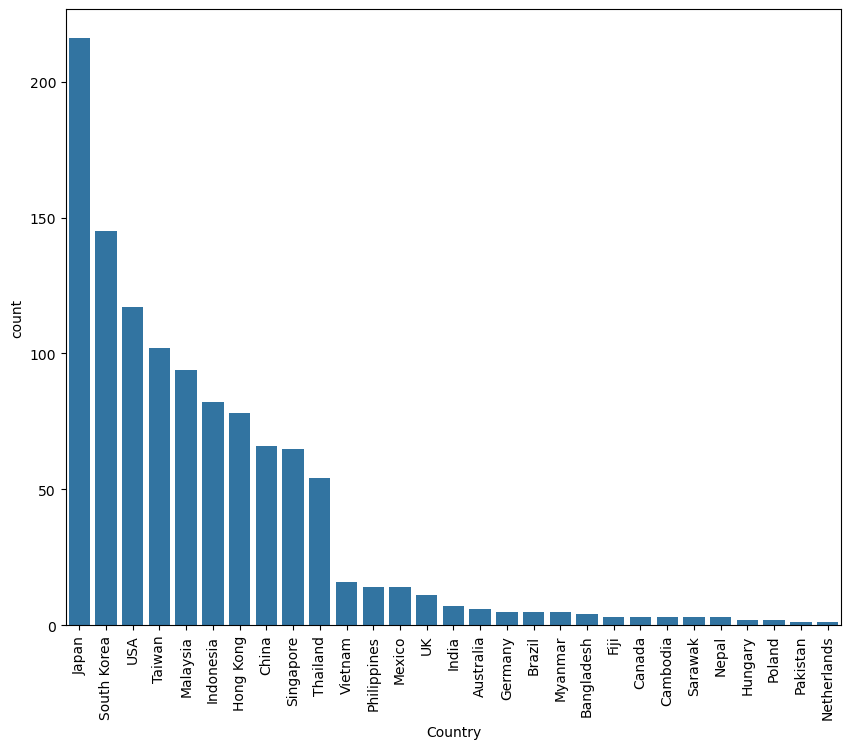

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(top_countries)
plt.xticks(rotation=90);


In [24]:
high_raited_by_brand = df_clean[df_clean['Rating_Desc'] == 'Excellent ⭐⭐⭐⭐']

top_brands = high_raited_by_brand['Brand'].value_counts()

In [25]:
top_brands

Brand
Nissin            203
Nongshim           60
Paldo              36
Indomie            36
Samyang Foods      33
                 ... 
Pama                1
Thai Chef           1
Nakaya Shouten      1
Sugakiya Foods      1
Higashi             1
Name: count, Length: 219, dtype: int64

In [26]:

style_counts = df_clean['Style'].value_counts()

valid_styles = style_counts[style_counts > 50].index


df_filtered = df_clean[df_clean['Style'].isin(valid_styles)]
df_style = df_filtered.groupby('Style')['Stars'].mean().sort_values(ascending=False)


In [27]:
df_style

Style
Pack    3.700130
Bowl    3.670686
Tray    3.545139
Cup     3.498500
Name: Stars, dtype: float64

<Axes: xlabel='Style', ylabel='Stars'>

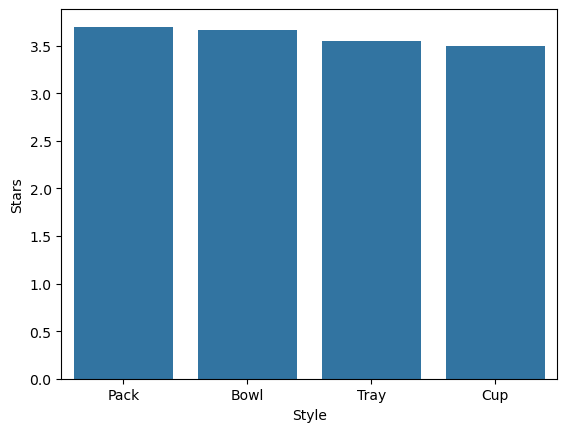

In [86]:
sns.barplot(df_style)

## 📊 Final Report – Ramen Ratings Analysis
1. Distribution of Rating Categories
Ramen products were categorized into five rating levels:

Excellent was the most common, representing 43.68% of the total.

Good followed closely with 40.54%.

Average, Poor, and Not Rated represented smaller portions of 9.69%, 5.08%, and 1.01% respectively.

This suggests that the majority of ramen products are perceived as good or excellent by reviewers.

2. Countries with the Most “Excellent” Ratings
When filtering for only the top-rated (“Excellent”) products:

Japan led the chart with 216 products.

Followed by South Korea (145), USA (117), and Taiwan (102).

Asian countries dominate the list, indicating regional strength in high-quality ramen production.

3. Brands with the Most “Excellent” Products
The brand Nissin significantly outperformed others with 203 highly rated products.

Other leading brands include Nongshim, Paldo, Indomie, and Samyang Foods.

This shows strong brand consistency in maintaining top-tier quality across different countries.

4. Best Styles of Ramen by Average Rating
Among the most common packaging styles (with >50 entries):

Pack style had the highest average rating at 3.70 stars, followed by Bowl (3.67), Tray (3.54), and Cup (3.50).

This may suggest a preference or higher quality perception in traditional packed ramen compared to cup noodles.

## Summary
The analysis indicates that:

Japan and South Korea are leaders in producing highly-rated ramen.

Brands like Nissin and Nongshim have established reputations for excellence.

Packaging style can influence perceived quality, with Pack and Bowl styles receiving higher ratings.

 ------------------

# we will Start statistics :

In [29]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# تفسير حجم الأثر
def interpret_cohens_d(d):
    d = abs(d)
    if d < 0.2:
        return "Very small effect"
    elif d < 0.5:
        return "Small effect"
    elif d < 0.8:
        return "Medium effect"
    else:
        return "Large effect"

# إنشاء DataFrame للنتيجة
def make_result_df(t_stat, p_val, cohens_d, interpretation, alpha):
    return pd.DataFrame([{
        'T-Statistic': round(t_stat, 4),
        'P-Value': round(p_val, 4),
        "Cohen's d": round(cohens_d, 4),
        'Effect Size': interpretation,
        'Significant': p_val < alpha
    }])
    
def t_test_independent_from_df(df, col, group_col, group1_val, group2_val, alpha=0.05):
    n1 = df[df[group_col] == group1_val][col].isna().sum()
    n2 = df[df[group_col] == group2_val][col].isna().sum()
    if n1 > 0 or n2 > 0:
        print(f"⚠️ Missing values → {group1_val}: {n1}, {group2_val}: {n2} (not dropped)")

    g1 = df[df[group_col] == group1_val][col].dropna()
    g2 = df[df[group_col] == group2_val][col].dropna()

    t_stat, p_val = ttest_ind(g1, g2)
    pooled_std = np.sqrt(((len(g1)-1)*np.var(g1, ddof=1) + (len(g2)-1)*np.var(g2, ddof=1)) / (len(g1)+len(g2)-2))
    cohens_d = (np.mean(g1) - np.mean(g2)) / pooled_std
    interpretation = interpret_cohens_d(cohens_d)

    print(f"\n📊 Independent T-Test between {group1_val} and {group2_val} on '{col}':")
    print(f"T = {t_stat:.4f}, P = {p_val:.4f}")
    print(f"Cohen's d = {cohens_d:.4f} → {interpretation}")
    print("✅ Significant difference" if p_val < alpha else "❌ No significant difference")

    plt.figure(figsize=(6,4))
    plt.boxplot([g1, g2], tick_labels=[str(group1_val), str(group2_val)])
    plt.title(f"Boxplot of '{col}' by '{group_col}'")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return make_result_df(t_stat, p_val, cohens_d, interpretation, alpha)


📊 Independent T-Test between Pack and Bowl on 'Stars':
T = 0.5626, P = 0.5738
Cohen's d = 0.0294 → Very small effect
❌ No significant difference


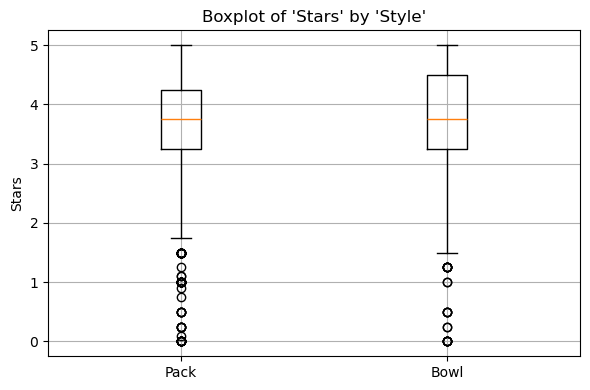

,T-Statistic,P-Value,Cohen's d,Effect Size,Significant
0,0.5626,0.5738,0.0294,Very small effect,False


In [30]:
t_test_independent_from_df(df_clean, 'Stars', 'Style', 'Pack', 'Bowl', alpha=0.05)

###  Independent T-Test: Pack vs Bowl (on 'Stars')

We conducted an independent t-test to compare the average star ratings between **Pack** and **Bowl** ramen styles.

| Metric         | Value    |
|----------------|----------|
| T-Statistic    | 0.5626   |
| P-Value        | 0.5738   |
| Cohen's d      | 0.0294   |
| Effect Size    | Very small effect |
| Significant?   | ❌ No (p > 0.05) |

### **Interpretation:**  
There is **no statistically significant difference** in average star ratings between Pack and Bowl.  
The effect size (Cohen's d = 0.0294) indicates a **very small or negligible difference**.

### **Conclusion:**  
Packaging style (Pack vs Bowl) does **not have a meaningful impact** on perceived quality in this dataset.


--------------------------------

--------------------------------------------------------

In [53]:
top_c = df_clean['Country'].value_counts().nlargest(5).index
df_clean['Country'] = df_clean['Country'].apply(lambda x: x if x in top_c else 'other')

In [54]:
df_clean['Country'].value_counts()

Country
other          1372
Japan           352
USA             323
South Korea     309
Taiwan          224
Name: count, dtype: int64

In [55]:
top_b = df_clean['Brand'].value_counts().nlargest(5).index
df_clean['Brand'] = df_clean['Brand'].apply(lambda x: x if x in top_b else 'other')

In [56]:
df_clean['Brand'].value_counts(ascending=False)

Brand
other       1954
Nissin       381
Nongshim      98
Maruchan      76
Mama          71
Name: count, dtype: int64

------------------------------------------------------------------------------------------------

In [74]:
top_s = df_clean['Style'].value_counts().nlargest(3).index
df_clean['Style'] = df_clean['Style'].apply(lambda x: x if x in top_s else 'other')

-----------------------------------------------------------------------------

In [75]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


In [76]:
# تحويل التقييمات إلى أقرب عدد صحيح
df_clean['Stars_rounded'] = df_clean['Stars'].round().astype(int)

# تحويلها إلى فئة مرتبة (رتبية)
df_clean['Stars_rounded'] = pd.Categorical(df_clean['Stars_rounded'], ordered=True)


# المتغيرات المستقلة
X = df_clean[['Country', 'Style', 'Brand']]
y = df_clean['Stars']

In [77]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [78]:
model = OrderedModel(
    y,
    X_encoded,
    distr='logit'  
)

# تدريب النموذج
result = model.fit(method='bfgs')  


Optimization terminated successfully.
         Current function value: 2.558171
         Iterations: 136
         Function evaluations: 137
         Gradient evaluations: 137


In [79]:
print(result.summary())


                             OrderedModel Results                             
Dep. Variable:                  Stars   Log-Likelihood:                -6600.1
Model:                   OrderedModel   AIC:                         1.330e+04
Method:            Maximum Likelihood   BIC:                         1.361e+04
Date:                Tue, 10 Jun 2025                                         
Time:                        22:03:45                                         
No. Observations:                2580                                         
Df Residuals:                    2528                                         
Df Model:                          11                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Country_South Korea    -0.4299      0.143     -2.996      0.003      -0.711      -0.149
Country_Taiwan         -0

# Ordinal Logistic Regression Summary – Star Rating Prediction
Dependent Variable: Stars (Ordered: 1 to 5)
Number of Observations: 2,580
Model: Ordinal Logistic Regression
Objective: To analyze how country of origin, product style, and brand influence the star rating of food products.

### Model Fit Indicators
Metric	Value	Interpretation
Log-Likelihood	-6600.1	Indicates the fit of the model; closer to 0 (less negative) is better.
AIC (Akaike Information Criterion)	13,300	Used for model comparison; lower is better.
BIC (Bayesian Information Criterion)	13,610	Penalizes model complexity; lower is better.
Degrees of Freedom (Model)	11	Number of predictors in the model.

### Effect of Country of Origin
Country	Coefficient	P-value	Interpretation
USA	-1.1034	< 0.001	Strong negative impact on star ratings compared to the reference country.
Taiwan	-0.4302	0.007	Moderate negative impact; statistically significant.
South Korea	-0.4299	0.003	Moderate negative impact; statistically significant.
Other	-0.7066	< 0.001	Strong negative impact on ratings.

### Effect of Product Style
Style	Coefficient	P-value	Interpretation
Cup	-0.4067	0.001	Statistically significant negative effect on ratings.
Pack	+0.1437	0.128	Slight positive effect; not statistically significant.
Other	+0.1025	0.585	No significant effect.

### Effect of Brand
Brand	Coefficient	P-value	Interpretation
Nissin	+0.6076	0.009	Significant positive effect on ratings.
Nongshim	+0.7660	0.008	Significant positive effect on ratings.
Maruchan	+0.0010	0.997	No effect at all (completely insignificant).
Other	-0.0983	0.648	No significant effect.

### Thresholds
The thresholds represent the model's learned cut-off points between adjacent star rating levels (e.g., from 3 to 4).
All threshold values are statistically significant (p < 0.001), indicating stable separation between star categories.
Note: These are internal to the model and not typically interpreted directly.

## Key Takeaways
Country of origin and brand are the most impactful factors in predicting star ratings.

USA-made products receive significantly lower ratings compared to the reference.

Brands like Nissin and Nongshim are associated with higher customer satisfaction.

The product style "Cup" has a significant negative association with ratings.

The model fit is solid, and the predictors show meaningful, interpretable effects.